In [45]:
!pip install matplotlib
import numpy as np
from numpy import mean,std
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset= pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
#distrubuting features and labels
x = dataset[['sepal-length','sepal-width','petal-length','petal-width']]    #features
y = dataset['Class']     #label

In [48]:
print(x)
print(y)

     sepal-length  sepal-width  petal-length  petal-width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: objec

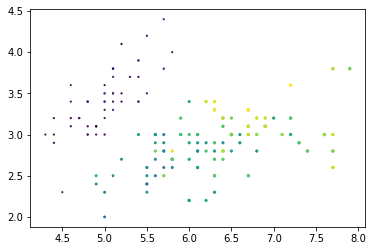

In [49]:
#for plotting the relationship b/w independent variables and dependent variabl
plt.scatter(dataset['sepal-length'],dataset['sepal-width'],dataset['petal-length'],dataset['petal-width'])

In [50]:
#divide data into train and test split for more accuracy
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [51]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

120
30
120
30


In [52]:
print('x-train\n',x_train)
print('x-test\n',x_test)
print('y-train\n',y_train)
print('y-test\n',y_test)

x-train
      sepal-length  sepal-width  petal-length  petal-width
137           6.4          3.1           5.5          1.8
84            5.4          3.0           4.5          1.5
27            5.2          3.5           1.5          0.2
127           6.1          3.0           4.9          1.8
132           6.4          2.8           5.6          2.2
..            ...          ...           ...          ...
9             4.9          3.1           1.5          0.1
103           6.3          2.9           5.6          1.8
67            5.8          2.7           4.1          1.0
117           7.7          3.8           6.7          2.2
47            4.6          3.2           1.4          0.2

[120 rows x 4 columns]
x-test
      sepal-length  sepal-width  petal-length  petal-width
114           5.8          2.8           5.1          2.4
62            6.0          2.2           4.0          1.0
33            5.5          4.2           1.4          0.2
107           7.3          2.9 

In [53]:
#scalling using lib
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print("x-train\n",x_train)
print("x-test\n",x_test)


x-train
 [[ 0.61303014  0.10850105  0.94751783  0.73603967]
 [-0.56776627 -0.12400121  0.38491447  0.34808318]
 [-0.80392556  1.03851009 -1.30289562 -1.3330616 ]
 [ 0.25879121 -0.12400121  0.60995581  0.73603967]
 [ 0.61303014 -0.58900572  1.00377816  1.25331499]
 [-0.80392556 -0.82150798  0.04735245  0.21876435]
 [-0.21352735  1.73601687 -1.19037495 -1.20374277]
 [ 0.14071157 -0.82150798  0.72247648  0.47740201]
 [ 0.02263193 -0.12400121  0.21613346  0.34808318]
 [-0.09544771 -1.05401024  0.10361279 -0.03987331]
 [ 1.0853487  -0.12400121  0.94751783  1.12399616]
 [-1.39432376  0.34100331 -1.41541629 -1.3330616 ]
 [ 1.20342834  0.10850105  0.72247648  1.38263382]
 [-1.04008484  1.03851009 -1.24663528 -0.81578628]
 [-0.56776627  1.50351461 -1.30289562 -1.3330616 ]
 [-1.04008484 -2.4490238  -0.1776889  -0.29851096]
 [ 0.73110978 -0.12400121  0.94751783  0.73603967]
 [ 0.96726906  0.57350557  1.0600385   1.64127148]
 [ 0.14071157 -1.98401928  0.66621615  0.34808318]
 [ 0.96726906 -1.28651

In [54]:
#variance ratio
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.72226528 0.23974795 0.03338117 0.0046056 ]


In [55]:
#Applying pca
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [56]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
0.9333333333333333


In [58]:
# scalling without lib

means_train=mean(x_train.T,axis=1)   #calculating mean  
stan_dev=std(x_train.T,axis=1)  #calculating standard deviation of each colum
center= x_train - means    #calculating center
scalling=center/stan_dev
print("x-train\n",scalling)

means_test=mean(x_test.T,axis=1)
stan_dev=std(x_test.T,axis=1)
center=x_test - means
scalling=center/stan_dev
print("x-test\n",scalling)


x-train
 [[ 0.94351893]
 [ 0.28455877]
 [-1.09206109]
 [ 0.74915285]
 [ 1.23179888]
 [ 0.14694088]
 [-0.92162564]
 [ 0.75943811]
 [ 0.4101259 ]
 [ 0.33139823]
 [ 1.25240394]
 [-1.21906109]
 [ 1.26693478]
 [-0.97241186]
 [-1.08211314]
 [ 0.04461988]
 [ 1.01196601]
 [ 1.33288255]
 [ 0.85535692]
 [ 1.30205537]
 [ 0.22694977]
 [ 1.78564065]
 [ 0.60183634]
 [ 0.20264729]
 [ 0.91778357]
 [ 0.79439769]
 [ 0.34655978]
 [ 1.04402063]
 [ 0.80367571]
 [ 1.04085138]
 [ 0.42131118]
 [-1.09262849]
 [ 0.81632338]
 [ 0.30833308]
 [ 0.12888892]
 [ 0.29643864]
 [ 0.51742554]
 [ 1.30210915]
 [-1.11882367]
 [-1.38452257]
 [ 1.07524358]
 [ 0.2063985 ]
 [-0.94824646]
 [-1.10726654]
 [ 0.88079419]
 [-1.18537805]
 [ 0.7143888 ]
 [-0.13055945]
 [-1.25648078]
 [ 0.83213544]
 [ 1.49853957]
 [ 0.2815705 ]
 [-1.14298439]
 [ 1.43984956]
 [ 1.35116927]
 [ 1.24369332]
 [ 1.18836344]
 [-1.20465278]
 [-1.18783815]
 [ 0.95804977]
 [ 1.15914076]
 [-0.96341772]
 [ 0.97273693]
 [-1.06283842]
 [ 0.8671929 ]
 [ 1.23804941]
 